Importation des données 

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df_=pd.read_csv('/content/AF_clean_commonensemble.csv',sep = ",",index_col='Unnamed: 0')

In [62]:
df_.head()

,C01_FC_NS,C02_FC_S,C03_FB1_NS,C04_FB1_S,C05_FB2_NS,C06_FB2_S,C19_FC_NS,C20_FC_S,C21_FB1_NS,C22_FB1_S,...,C42_FB2_S,B1a,B1b,B1c,B2a,B2b,B2c,Ca,Cb,Cc
ENSG00000121410,63.18,55.44,58.71,120.75,53.60,48.01,66.95,55.08,64.96,51.28,...,65.82,68.19,53.93,59.21,61.68,75.61,43.32,64.26,58.22,66.03
ENSG00000268895,187.06,196.59,247.60,219.97,196.65,196.16,222.06,180.74,261.04,249.73,...,224.58,265.06,302.66,258.56,304.68,294.91,336.54,247.02,239.66,354.33
ENSG00000148584,71.01,63.08,72.32,61.91,66.78,76.65,57.09,74.39,64.67,65.10,...,66.67,58.04,53.60,62.41,59.78,63.23,64.47,59.92,59.42,63.92
ENSG00000175899,124.72,117.76,115.15,90.92,77.94,50.86,114.79,96.17,114.61,90.46,...,175.14,90.98,99.90,99.60,40.51,90.94,68.34,92.96,92.69,102.75
ENSG00000166535,52.92,47.73,56.08,44.88,53.37,66.28,68.13,53.42,55.55,62.09,...,57.61,59.78,59.70,58.10,47.26,55.83,45.26,67.50,64.71,69.83


In [63]:
df_.shape

(20352, 27)

Détection des valeurs abbérentes

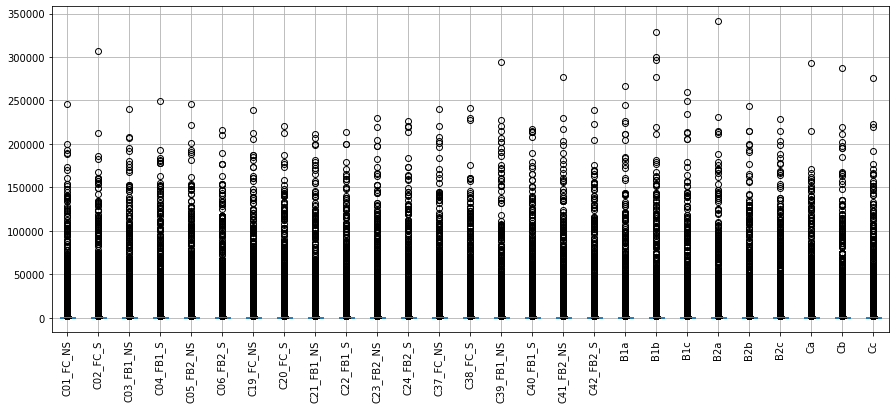

In [64]:
plt.figure(figsize=(15,6))
df_.boxplot(rot=90);

In [65]:
features=df_.columns
features

Index(['C01_FC_NS', 'C02_FC_S', 'C03_FB1_NS', 'C04_FB1_S', 'C05_FB2_NS',
       'C06_FB2_S', 'C19_FC_NS', 'C20_FC_S', 'C21_FB1_NS', 'C22_FB1_S',
       'C23_FB2_NS', 'C24_FB2_S', 'C37_FC_NS', 'C38_FC_S', 'C39_FB1_NS',
       'C40_FB1_S', 'C41_FB2_NS', 'C42_FB2_S', 'B1a', 'B1b', 'B1c', 'B2a',
       'B2b', 'B2c', 'Ca', 'Cb', 'Cc'],
      dtype='object')

Suppression des valeurs abbérentes

In [66]:
def drop_outliers(df,features):
    Q1=np.percentile(df[feature],25)
    Q3=np.percentile(df[feature],75)
    limit=1.5*(Q3-Q1)
    df.drop(df[df[feature] > limit + Q3].index, inplace=True)
    df.drop(df[df[feature] < Q1 - limit].index, inplace=True)

In [67]:
for feature in features:
    drop_outliers(df_,feature)


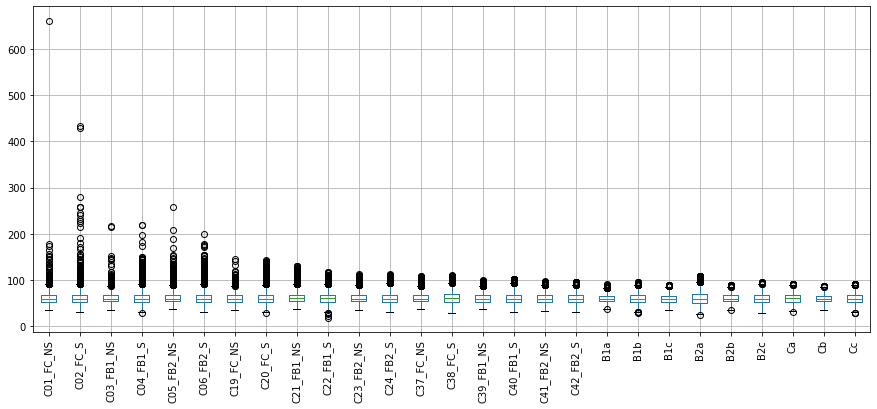

In [68]:
plt.figure(figsize=(15,6))
df_.boxplot(rot=90);

In [69]:
iq_C01=df_['C01_FC_NS'].quantile(0.75)-df_['C01_FC_NS'].quantile(0.25)
df_.drop(df_[df_['C01_FC_NS']>df_['C01_FC_NS'].quantile(0.75)+iq_C01].index,inplace=True)

In [70]:
iq_C02=df_['C02_FC_S'].quantile(0.75)-df_['C02_FC_S'].quantile(0.25)
df_.drop(df_[df_['C02_FC_S']>df_['C02_FC_S'].quantile(0.75)+iq_C02].index,inplace=True)

Normalisation des données

In [71]:
X=df_.select_dtypes('number')
X.shape

(4570, 27)

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
X_scaled=StandardScaler()
X_scaled=X_scaled.fit_transform(X)

In [74]:
X_scaled=pd.DataFrame(X_scaled,index=X.index,columns=X.columns)

In [76]:
#Affichons les variables
sort_by_mean = X.mean().sort_values(ascending=True)

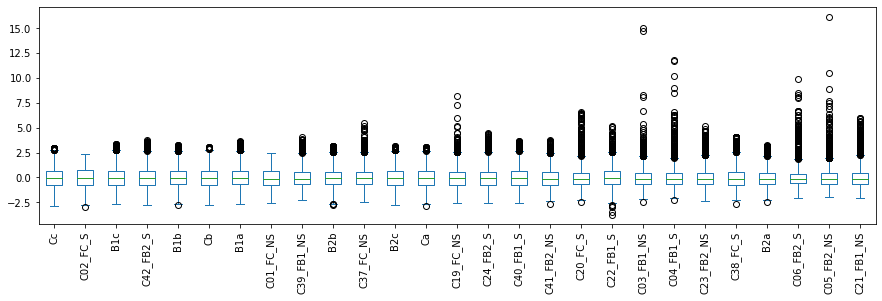

In [77]:
X_scaled[sort_by_mean.index].plot(kind='box', figsize=(15, 4), rot=90)

ACP

In [78]:
from sklearn.decomposition import PCA

In [80]:
pca=PCA()

In [81]:
X_PCA=pca.fit_transform(X_scaled.T)

In [83]:
pca_columns=['PC' + str(c) for c in range(1,X_PCA.shape[1]+1,1)]
X_PCA=pd.DataFrame(X_PCA,columns=pca_columns)
X_PCA.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
0,-23.279787,-9.375210,-1.033079,-1.440876,-0.297474,-0.530248,-2.700615,-2.798442,-2.970531,-2.912832,...,-4.764695,-7.483524,-10.968491,-0.506683,1.317671,-4.371146,17.480681,19.327832,4.432836,9.246545e-15
1,3.352681,-16.498055,-5.508330,-10.248523,1.321887,-7.714771,-3.516057,5.935419,-3.667631,-7.738213,...,-2.856029,-4.410143,-12.262221,15.110248,7.427575,-0.379817,2.597628,-16.356397,-2.685505,9.246545e-15


Variance expliquée 

In [84]:
pca.explained_variance_ratio_

array([1.23564706e-01, 9.23038076e-02, 6.25206581e-02, 5.29430264e-02,
       4.91038656e-02, 4.71312426e-02, 4.52908713e-02, 4.09358274e-02,
       4.03424048e-02, 3.96772671e-02, 3.73546593e-02, 3.53479958e-02,
       3.41220920e-02, 3.08083287e-02, 2.92499980e-02, 2.80913267e-02,
       2.74483078e-02, 2.58419399e-02, 2.40160289e-02, 2.29830592e-02,
       2.07919367e-02, 1.95483342e-02, 1.89891595e-02, 1.83481022e-02,
       1.76965079e-02, 1.55485463e-02, 3.85351439e-32])

In [86]:
explaind_var=pd.Series(dict(zip(X_PCA.columns,100*pca.explained_variance_ratio_)))
print(explaind_var.head())

PC1    12.356471
PC2     9.230381
PC3     6.252066
PC4     5.294303
PC5     4.910387
dtype: float64


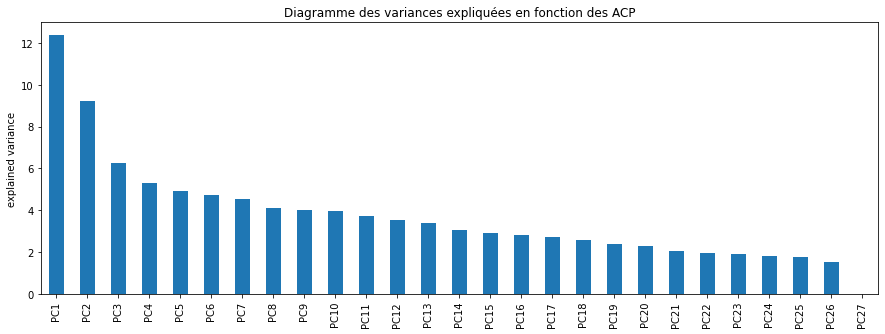

In [88]:
explaind_var.plot(kind='bar',figsize=(15,5),rot=90,ylabel='explained variance')
plt.title('Diagramme des variances expliquées en fonction des ACP')
plt.show()

In [89]:
explaind_var['PC1']+explaind_var['PC2']

21.586851353481386

In [90]:
X_PCA['obs']=X.columns

Visualisation ACP

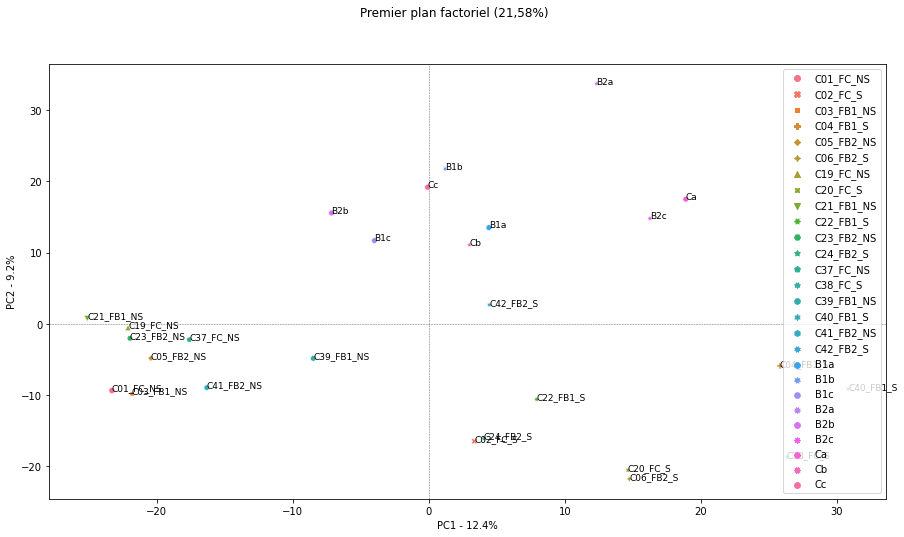

In [91]:
fig, ax = plt.subplots(figsize=(15,8))
plt.axvline(x = 0, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 0, linewidth = .5, color = "dimgray", linestyle = "--")
sns.scatterplot(x="PC1",y='PC2',data=X_PCA,hue='obs',style='obs')


for k in X_PCA.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['PC1']) > 3.5) | (abs(k[1]['PC2']) > 1.5):
        ax.annotate(k[1]["obs"], (k[1]['PC1'], k[1]['PC2']), fontsize = 9)

plt.xlabel('PC1 - ' + '{:.1f}%'.format(explaind_var['PC1']))
plt.ylabel('PC2 - ' + '{:.1f}%'.format(explaind_var['PC2']))
plt.legend()
plt.suptitle("Premier plan factoriel (21,58%)")
plt.show()

TSNE

In [92]:
from sklearn.manifold import TSNE

In [120]:
tsne=TSNE(n_components=2,perplexity=5,init='pca',random_state=0,n_jobs=-1)

In [121]:
X_TSNE=tsne.fit_transform(X_scaled.T)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [122]:
tsne_columns=["DIM"+str(c) for c in range(1, X_TSNE.shape[1]+1,1)]
X_tsne=pd.DataFrame(X_TSNE,columns=tsne_columns)

In [123]:
X_tsne['obs']=df_.columns

In [124]:
X_tsne.head()

,DIM1,DIM2,obs
0,148.688248,216.811249,C01_FC_NS
1,-208.492065,184.730621,C02_FC_S
2,228.304855,247.979568,C03_FB1_NS
3,-456.472046,131.793335,C04_FB1_S
4,292.774658,130.717865,C05_FB2_NS


Visualisation TSNE

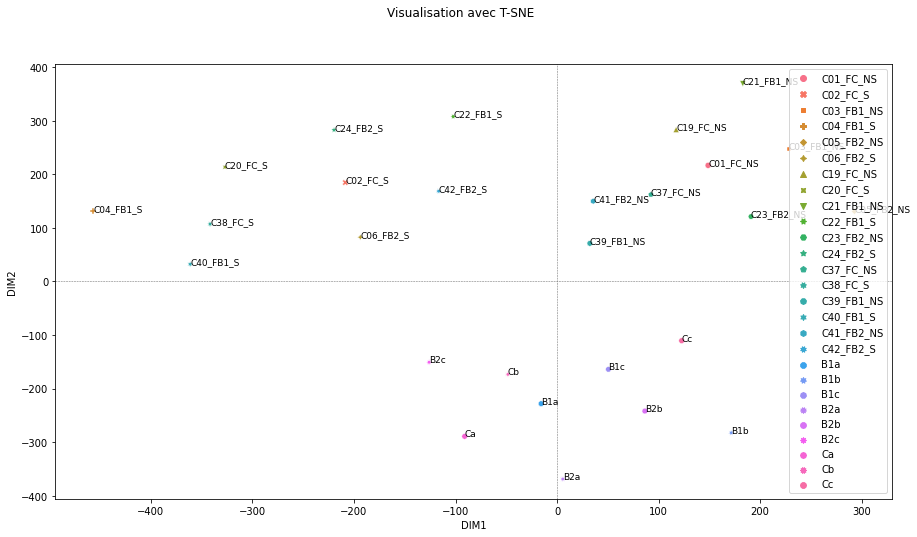

In [125]:
fig, ax = plt.subplots(figsize=(15,8))
plt.axvline(x = 0, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 0, linewidth = .5, color = "dimgray", linestyle = "--")
sns.scatterplot(x="DIM1",y='DIM2',data=X_tsne,hue="obs",style="obs")


for k in X_tsne.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['DIM1']) > 0.1) | (abs(k[1]['DIM2']) >4):
        ax.annotate(k[1]["obs"], (k[1]['DIM1'], k[1]['DIM2']), fontsize = 9)

plt.xlabel('DIM1' )
plt.ylabel('DIM2')
plt.legend()
plt.suptitle("Visualisation avec T-SNE")
plt.show()

Construction  de notre modéle

In [126]:
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [127]:
from keras.layers import Input, Dense, Dropout, Activation,Lambda,Layer
from keras.layers.noise import GaussianDropout
from keras.models import Model
from keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import keras
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [128]:
from tensorflow.keras.utils import plot_model

In [129]:
from tensorflow.keras.models import Sequential

In [183]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [131]:
X_norm=X_scaled.T

In [132]:
np.random.seed(123)
test_set_percent = 0.1
cp1_test = X_norm.sample(frac=test_set_percent)
cp1_train = X_norm.drop(cp1_test.index)

Encoder

In [184]:
encoder=Sequential()
encoder.add(Dense(units=2000,activation='relu',input_shape=[4570]))
encoder.add(Dense(units=1000,activation='relu',input_shape=[2000]))
encoder.add(Dense(units=500,activation='relu',input_shape=[1000]))
encoder.add(Dense(units=250,activation='relu',input_shape=[500]))
encoder.add(Dense(units=100,activation='relu',input_shape=[250]))
encoder.summary()


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 2000)              9142000   
                                                                 
 dense_50 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_51 (Dense)            (None, 500)               500500    
                                                                 
 dense_52 (Dense)            (None, 250)               125250    
                                                                 
 dense_53 (Dense)            (None, 100)               25100     
                                                                 
Total params: 11,793,850
Trainable params: 11,793,850
Non-trainable params: 0
_________________________________________________________________


In [185]:
decoder=Sequential()
decoder.add(Dense(units=250,activation='relu',input_shape=[100]))
decoder.add(Dense(units=500,activation='relu',input_shape=[250]))
decoder.add(Dense(units=1000,activation='relu',input_shape=[500]))
decoder.add(Dense(units=2000,activation='relu',input_shape=[1000]))
decoder.add(Dense(units=4570,activation='relu',input_shape=[2000]))

Autoencoder

In [186]:
autoencoder=Sequential([encoder,decoder])

In [187]:
autoencoder.compile(optimizer=Adam(learning_rate = 0.001), loss='mse')

In [188]:
AE=autoencoder.fit(np.array(cp1_train), np.array(cp1_train),
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_data=(np.array(cp1_test), np.array(cp1_test)),
                callbacks=[early_stop])

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.0007 - val_loss: 0.9768
Epoch 2/100
1/1 [==============================] - 0s 214ms/step - loss: 0.9652 - val_loss: 1.5645
Epoch 3/100
1/1 [==============================] - 0s 214ms/step - loss: 1.7921 - val_loss: 0.9341
Epoch 4/100
1/1 [==============================] - 0s 218ms/step - loss: 0.8994 - val_loss: 0.9659
Epoch 5/100
1/1 [==============================] - 0s 208ms/step - loss: 0.9473 - val_loss: 0.9488
Epoch 6/100
1/1 [==============================] - 0s 201ms/step - loss: 0.9187 - val_loss: 0.9051
Epoch 7/100
1/1 [==============================] - 0s 207ms/step - loss: 0.8440 - val_loss: 1.0068
Epoch 8/100
1/1 [==============================] - 0s 210ms/step - loss: 0.9729 - val_loss: 0.8803
Epoch 9/100
1/1 [==============================] - 0s 213ms/step - loss: 0.7977 - val_loss: 0.9004
Epoch 10/100
1/1 [==============================] - 0s 212ms/step - loss: 0.8342 - val_loss: 0.9109
Epoch 11/100

In [189]:
model_loss=pd.DataFrame(AE.history)
model_loss.head()

,loss,val_loss
0,1.000710,0.976830
1,0.965241,1.564531
2,1.792062,0.934109
3,0.899426,0.965943
4,0.947251,0.948825


Text(0, 0.5, 'VAE Loss')

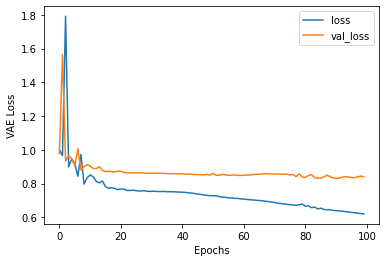

In [190]:
ax = model_loss.plot()
ax.set_xlabel('Epochs')
ax.set_ylabel('VAE Loss')

In [199]:
from tensorflow.keras.layers import Dropout

In [ ]:
encoder=Sequential()
encoder.add(Dense(units=2000,activation='relu',input_shape=[4570]))

encoder.add(Dense(units=1000,activation='relu',input_shape=[2000]))

encoder.add(Dense(units=500,activation='relu',input_shape=[1000]))


encoder.add(Dense(units=250,activation='relu',input_shape=[500]))


encoder.add(Dense(units=100,activation='relu',input_shape=[250]))

**hyperparametrisation**

In [191]:
class model():
    """
    Facilitates the training and output of tybalt model trained on TCGA RNAseq gene expression data
    """
    def __init__(self, original_dim, hidden_dim, latent_dim,
                 batch_size, epochs, learning_rate):
        self.original_dim = original_dim
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        self.batch_size = batch_size
        self.epochs = epochs
        self.learning_rate = learning_rate

    def build_encoder_layer(self):
      self.encoder_model = Sequential()
      self.encoder_model.add(Dense(self.hidden_dim,input_dim=self.original_dim,activation='relu')) 
      self.encoder_model.add(Dense(self.latent_dim ,input_dim=self.hidden_dim,activation='relu'))

    def build_decoder_layer(self):
        # The decoding layer is much simpler with a single layer glorot uniform initialized and sigmoid activation
        self.decoder_model = Sequential()
        self.decoder_model.add(Dense(self.hidden_dim, activation='relu', input_dim=self.latent_dim))
        self.decoder_model.add(Dense(self.original_dim, activation='sigmoid'))  

    def compile_ae(self):    
      self.ae = Sequential([self.encoder_model,self.decoder_model])
      self.ae.compile(optimizer=Adam(learning_rate = 0.001), loss='mse')
    def visualize_architecture(self, output_file):
        # Visualize the connections of the custom VAE model
        plot_model(self.ae, to_file=output_file)  
    def train_ae(self):
      self.AE=self.ae.fit(np.array(cp1_train), np.array(cp1_train),
                epochs=self.epochs,
                batch_size=self.batch_size,
                shuffle=True,
                validation_data=(np.array(cp1_test), np.array(cp1_test)),
                callbacks=[early_stop])
      
    def visualize_training(self):
        # Visualize training performance
        history_df = pd.DataFrame(self.AE.history)
        ax = history_df.plot()
        ax.set_xlabel('Epochs')
        ax.set_ylabel('VAE Loss')
             



In [192]:
original_dim = X_norm.shape[1]
latent_dim = 100

In [194]:
# Model A (100 hidden layer size)
model_a_latent_dim = 100
model_a_batch_size = 100
model_a_epochs = 200
model_a_learning_rate = 0.001

In [195]:
model_a = model(original_dim=original_dim,
                 hidden_dim=model_a_latent_dim,
                 latent_dim=latent_dim,
                 batch_size=model_a_batch_size,
                 epochs=model_a_epochs,
                 learning_rate=model_a_learning_rate)

In [196]:
model_a.build_encoder_layer()
model_a.build_decoder_layer()
model_a.compile_ae()

In [197]:
model_a.train_ae()

Epoch 1/200
1/1 [==============================] - 1s 567ms/step - loss: 1.2498 - val_loss: 1.2309
Epoch 2/200
1/1 [==============================] - 0s 42ms/step - loss: 1.2246 - val_loss: 1.1892
Epoch 3/200
1/1 [==============================] - 0s 36ms/step - loss: 1.1654 - val_loss: 1.1242
Epoch 4/200
1/1 [==============================] - 0s 41ms/step - loss: 1.0760 - val_loss: 1.0480
Epoch 5/200
1/1 [==============================] - 0s 41ms/step - loss: 0.9756 - val_loss: 0.9763
Epoch 6/200
1/1 [==============================] - 0s 39ms/step - loss: 0.8861 - val_loss: 0.9216
Epoch 7/200
1/1 [==============================] - 0s 39ms/step - loss: 0.8212 - val_loss: 0.8866
Epoch 8/200
1/1 [==============================] - 0s 42ms/step - loss: 0.7813 - val_loss: 0.8668
Epoch 9/200
1/1 [==============================] - 0s 44ms/step - loss: 0.7597 - val_loss: 0.8572
Epoch 10/200
1/1 [==============================] - 0s 58ms/step - loss: 0.7494 - val_loss: 0.8534
Epoch 11/200
1/1 [

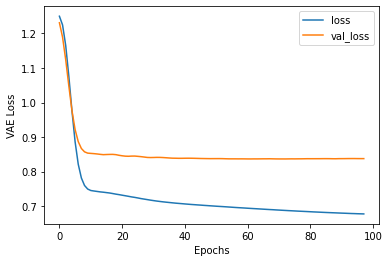

In [198]:
model_a.visualize_training()

In [171]:
model_b_latent_dim = 300
model_b_batch_size = 50
model_b_epochs = 300
model_b_learning_rate = 0.0005
model_b_kappa = 0.01

In [172]:
model_b = model(original_dim=original_dim,
                 hidden_dim=model_b_latent_dim,
                 latent_dim=latent_dim,
                 batch_size=model_b_batch_size,
                 epochs=model_b_epochs,
                 learning_rate=model_b_learning_rate)

In [173]:
model_b.build_encoder_layer()
model_b.build_decoder_layer()
model_b.compile_ae()

In [174]:
model_b.train_ae()

Epoch 1/300
1/1 [==============================] - 1s 875ms/step - loss: 1.2500 - val_loss: 1.2221
Epoch 2/300
1/1 [==============================] - 0s 190ms/step - loss: 1.2056 - val_loss: 1.1371
Epoch 3/300
1/1 [==============================] - 0s 140ms/step - loss: 1.0817 - val_loss: 1.0178
Epoch 4/300
1/1 [==============================] - 0s 125ms/step - loss: 0.9270 - val_loss: 0.9221
Epoch 5/300
1/1 [==============================] - 0s 95ms/step - loss: 0.8157 - val_loss: 0.8738
Epoch 6/300
1/1 [==============================] - 0s 77ms/step - loss: 0.7645 - val_loss: 0.8572
Epoch 7/300
1/1 [==============================] - 0s 54ms/step - loss: 0.7490 - val_loss: 0.8544
Epoch 8/300
1/1 [==============================] - 0s 56ms/step - loss: 0.7457 - val_loss: 0.8540
Epoch 9/300
1/1 [==============================] - 0s 59ms/step - loss: 0.7438 - val_loss: 0.8520
Epoch 10/300
1/1 [==============================] - 0s 63ms/step - loss: 0.7422 - val_loss: 0.8502
Epoch 11/300
1/

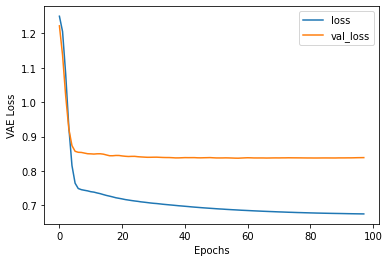

In [175]:
model_b.visualize_training()